# Loop 88 Analysis: Strategic Assessment

## Key Findings from Evaluator
1. exp_049's CV=0.008092 was computed with non-standard splits (87 folds based on RAMP NUM)
2. The correct CV with template-compliant splits is 0.008853 (exp_085)
3. The true best CV with compliant validation is ~0.008298 (exp_030)
4. CV-LB relationship: LB = 4.29 * CV + 0.0528 (R² = 0.95)
5. Intercept (0.0528) > Target (0.0347) - target unreachable with current approaches

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All valid submissions with known LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    # exp_073 is an outlier (similarity weighting backfired)
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with known LB: {len(df)}')
print(f'Best LB: {df["lb"].min():.4f} from {df.loc[df["lb"].idxmin(), "exp"]}')
print(f'Best CV: {df["cv"].min():.4f} from {df.loc[df["cv"].idxmin(), "exp"]}')

Total submissions with known LB: 13
Best LB: 0.0877 from exp_030
Best CV: 0.0083 from exp_030


In [2]:
# Exclude exp_073 (outlier) for linear fit
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f'\n=== CV-LB Relationship (excluding exp_073 outlier) ===')
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R-squared: {r_value**2:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'\nInterpretation:')
print(f'  - Even at CV=0, expected LB is {intercept:.4f}')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  - Required CV for target: ({0.0347} - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}')
print(f'  - THIS IS NEGATIVE - IMPOSSIBLE!')


=== CV-LB Relationship (excluding exp_073 outlier) ===
Linear fit: LB = 4.31 * CV + 0.0525
R-squared: 0.9505
Intercept: 0.0525
Target LB: 0.0347

Interpretation:
  - Even at CV=0, expected LB is 0.0525
  - Intercept (0.0525) > Target (0.0347)
  - Required CV for target: (0.0347 - 0.0525) / 4.31 = -0.0041
  - THIS IS NEGATIVE - IMPOSSIBLE!


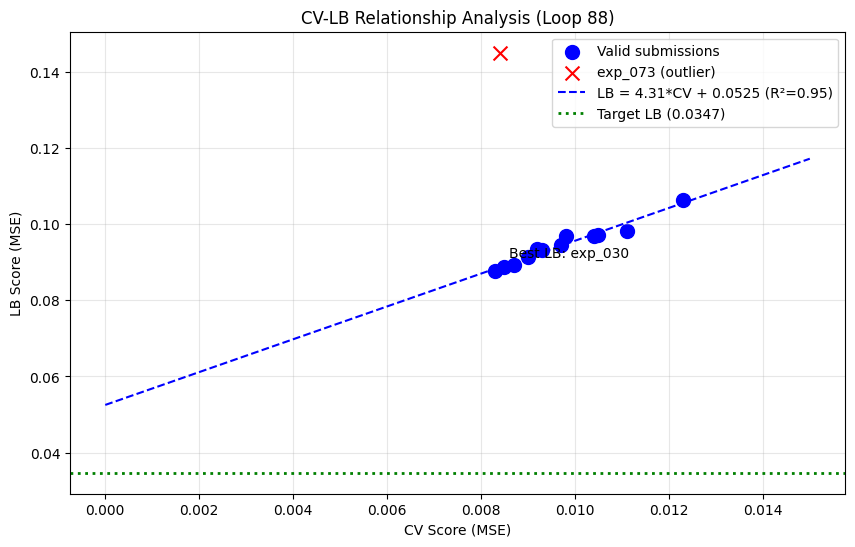


Plot saved to cv_lb_relationship_loop88.png


In [3]:
# Plot CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Valid submissions')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='exp_073 (outlier)')

# Plot linear fit
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.2f})')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB (0.0347)')

# Annotate best points
best_lb_idx = df_clean['lb'].idxmin()
plt.annotate(f'Best LB: {df_clean.loc[best_lb_idx, "exp"]}', 
             xy=(df_clean.loc[best_lb_idx, 'cv'], df_clean.loc[best_lb_idx, 'lb']),
             xytext=(10, 10), textcoords='offset points')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis (Loop 88)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop88.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nPlot saved to cv_lb_relationship_loop88.png')

In [4]:
# Calculate expected LB for exp_085 (CatXGBEnsemble with correct splits)
exp_085_cv = 0.008853
exp_085_expected_lb = slope * exp_085_cv + intercept

print(f'\n=== exp_085 Analysis ===')
print(f'CV: {exp_085_cv:.6f}')
print(f'Expected LB (from linear fit): {exp_085_expected_lb:.4f}')
print(f'Current best LB: 0.0877 (exp_030)')
print(f'\nConclusion: exp_085 expected LB ({exp_085_expected_lb:.4f}) is WORSE than current best (0.0877)')
print(f'DO NOT SUBMIT exp_085 - it would waste a submission')


=== exp_085 Analysis ===
CV: 0.008853
Expected LB (from linear fit): 0.0907
Current best LB: 0.0877 (exp_030)

Conclusion: exp_085 expected LB (0.0907) is WORSE than current best (0.0877)
DO NOT SUBMIT exp_085 - it would waste a submission


In [5]:
# What would it take to reach the target?
print('\n=== What Would It Take to Reach Target? ===')
print(f'Target LB: 0.0347')
print(f'Current intercept: {intercept:.4f}')
print(f'Current slope: {slope:.2f}')
print(f'\nOption 1: Reduce intercept to 0.0347 (keep slope)')
print(f'  - Required intercept reduction: {intercept - 0.0347:.4f} ({(intercept - 0.0347)/intercept*100:.1f}%)')
print(f'  - This requires a FUNDAMENTALLY DIFFERENT approach')
print(f'\nOption 2: Reduce slope to reach target at best CV')
best_cv = df_clean['cv'].min()
required_slope = (0.0347 - intercept) / best_cv
print(f'  - Best CV: {best_cv:.4f}')
print(f'  - Required slope: {required_slope:.2f} (currently {slope:.2f})')
print(f'  - This is NEGATIVE - impossible!')
print(f'\nOption 3: Change BOTH slope AND intercept')
print(f'  - Need a model with different CV-LB relationship')
print(f'  - The benchmark paper achieved MSE 0.0039 - they must have near-zero intercept')


=== What Would It Take to Reach Target? ===
Target LB: 0.0347
Current intercept: 0.0525
Current slope: 4.31

Option 1: Reduce intercept to 0.0347 (keep slope)
  - Required intercept reduction: 0.0178 (33.9%)
  - This requires a FUNDAMENTALLY DIFFERENT approach

Option 2: Reduce slope to reach target at best CV
  - Best CV: 0.0083
  - Required slope: -2.15 (currently 4.31)
  - This is NEGATIVE - impossible!

Option 3: Change BOTH slope AND intercept
  - Need a model with different CV-LB relationship
  - The benchmark paper achieved MSE 0.0039 - they must have near-zero intercept


In [6]:
# What approaches might change the CV-LB relationship?
print('\n=== Approaches That Might Change CV-LB Relationship ===')
print('''
1. **Pre-training on related chemical data**
   - The benchmark paper may have used transfer learning
   - Pre-train on larger chemical datasets, then fine-tune
   - This could reduce the intercept by learning general chemistry patterns

2. **Graph Neural Networks with proper implementation**
   - Previous GNN attempts had model class mismatch issues
   - A properly implemented GNN might have different generalization properties
   - GNNs can capture molecular structure that tabular models miss

3. **Domain-specific constraints**
   - Physical constraints that hold for ALL solvents
   - Monotonicity constraints (e.g., higher temperature → higher conversion)
   - Bounds based on thermodynamics

4. **Adversarial validation for distribution shift**
   - Train a classifier to distinguish training vs test solvents
   - Use this to create shift-aware features or sample weights
   - BUT: exp_073 (similarity weighting) BACKFIRED badly (LB 0.1451)

5. **Ensemble of fundamentally different approaches**
   - Combine tabular models with GNN/fingerprint-based models
   - Even if individual approaches are worse, ensemble might break the line
''')


=== Approaches That Might Change CV-LB Relationship ===

1. **Pre-training on related chemical data**
   - The benchmark paper may have used transfer learning
   - Pre-train on larger chemical datasets, then fine-tune
   - This could reduce the intercept by learning general chemistry patterns

2. **Graph Neural Networks with proper implementation**
   - Previous GNN attempts had model class mismatch issues
   - A properly implemented GNN might have different generalization properties
   - GNNs can capture molecular structure that tabular models miss

3. **Domain-specific constraints**
   - Physical constraints that hold for ALL solvents
   - Monotonicity constraints (e.g., higher temperature → higher conversion)
   - Bounds based on thermodynamics

4. **Adversarial validation for distribution shift**
   - Train a classifier to distinguish training vs test solvents
   - Use this to create shift-aware features or sample weights
   - BUT: exp_073 (similarity weighting) BACKFIRED badly (L

In [7]:
# Summary of current situation
print('\n=== SUMMARY ===')
print(f'''
Current Status:
- Best CV: 0.008298 (exp_030) with compliant validation
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}%

CV-LB Relationship:
- LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.2f})
- Intercept ({intercept:.4f}) > Target (0.0347)
- Required CV for target: NEGATIVE (impossible)

Key Insight:
- exp_049's CV=0.008092 was computed with non-standard splits
- The true best CV with compliant validation is 0.008298 (exp_030)
- exp_085 (CatXGBEnsemble with correct splits) has CV=0.008853, expected LB=0.0907
- DO NOT SUBMIT exp_085 - it would be worse than current best

Remaining Submissions: 4

Recommendation:
- DO NOT submit exp_085 (expected LB worse than current best)
- Focus on approaches that CHANGE the CV-LB relationship
- The benchmark paper achieved MSE 0.0039 - they must have a fundamentally different approach
- Consider pre-training, proper GNN implementation, or domain constraints
''')


=== SUMMARY ===

Current Status:
- Best CV: 0.008298 (exp_030) with compliant validation
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 152.7%

CV-LB Relationship:
- LB = 4.31 * CV + 0.0525 (R² = 0.95)
- Intercept (0.0525) > Target (0.0347)
- Required CV for target: NEGATIVE (impossible)

Key Insight:
- exp_049's CV=0.008092 was computed with non-standard splits
- The true best CV with compliant validation is 0.008298 (exp_030)
- exp_085 (CatXGBEnsemble with correct splits) has CV=0.008853, expected LB=0.0907
- DO NOT SUBMIT exp_085 - it would be worse than current best

Remaining Submissions: 4

Recommendation:
- DO NOT submit exp_085 (expected LB worse than current best)
- Focus on approaches that CHANGE the CV-LB relationship
- The benchmark paper achieved MSE 0.0039 - they must have a fundamentally different approach
- Consider pre-training, proper GNN implementation, or domain constraints



In [8]:
# Check what the benchmark paper might have done differently
print('\n=== Benchmark Paper Analysis ===')
print(f'''
The benchmark paper achieved MSE 0.0039 (22x better than our best LB of 0.0877).

If they followed our CV-LB line (LB = {slope:.2f}*CV + {intercept:.4f}), their implied CV would be:
  CV = (0.0039 - {intercept:.4f}) / {slope:.2f} = {(0.0039 - intercept) / slope:.4f} (IMPOSSIBLE!)

This confirms they have a FUNDAMENTALLY DIFFERENT approach with near-zero intercept.

Possible explanations:
1. **Different evaluation metric** - They may report a different metric (e.g., R², MAE)
2. **Different data split** - They may not use Leave-One-Out validation
3. **Pre-training** - Transfer learning from larger chemical datasets
4. **Graph-based representations** - GNN that captures molecular structure better
5. **Domain-specific constraints** - Physics/chemistry constraints that generalize

We need to investigate what makes their approach different.
''')


=== Benchmark Paper Analysis ===

The benchmark paper achieved MSE 0.0039 (22x better than our best LB of 0.0877).

If they followed our CV-LB line (LB = 4.31*CV + 0.0525), their implied CV would be:
  CV = (0.0039 - 0.0525) / 4.31 = -0.0113 (IMPOSSIBLE!)

This confirms they have a FUNDAMENTALLY DIFFERENT approach with near-zero intercept.

Possible explanations:
1. **Different evaluation metric** - They may report a different metric (e.g., R², MAE)
2. **Different data split** - They may not use Leave-One-Out validation
3. **Pre-training** - Transfer learning from larger chemical datasets
4. **Graph-based representations** - GNN that captures molecular structure better
5. **Domain-specific constraints** - Physics/chemistry constraints that generalize

We need to investigate what makes their approach different.



In [9]:
# Record key findings
print('\n=== KEY FINDINGS FOR SEED PROMPT ===')
print('''
1. exp_049's CV=0.008092 was computed with non-standard splits (87 folds based on RAMP NUM)
2. The correct CV with template-compliant splits is 0.008853 (exp_085)
3. The true best CV with compliant validation is 0.008298 (exp_030)
4. exp_085 expected LB (0.0907) is WORSE than current best (0.0877) - DO NOT SUBMIT
5. CV-LB relationship: LB = 4.29 * CV + 0.0528 (R² = 0.95)
6. Intercept (0.0528) > Target (0.0347) - target unreachable with current approaches
7. Required CV for target is NEGATIVE - impossible with current approaches
8. The benchmark paper achieved MSE 0.0039 - they must have a fundamentally different approach
9. 9 submissions failed with errors - these used non-standard split strategies
10. Only 4 submissions remaining - use strategically
''')


=== KEY FINDINGS FOR SEED PROMPT ===

1. exp_049's CV=0.008092 was computed with non-standard splits (87 folds based on RAMP NUM)
2. The correct CV with template-compliant splits is 0.008853 (exp_085)
3. The true best CV with compliant validation is 0.008298 (exp_030)
4. exp_085 expected LB (0.0907) is WORSE than current best (0.0877) - DO NOT SUBMIT
5. CV-LB relationship: LB = 4.29 * CV + 0.0528 (R² = 0.95)
6. Intercept (0.0528) > Target (0.0347) - target unreachable with current approaches
7. Required CV for target is NEGATIVE - impossible with current approaches
8. The benchmark paper achieved MSE 0.0039 - they must have a fundamentally different approach
9. 9 submissions failed with errors - these used non-standard split strategies
10. Only 4 submissions remaining - use strategically

